In [1]:
 # Dependencies and Setup
    
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv" 

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)




In [3]:
# Combine the data into a single dataset 

mouse_results_df = pd.merge(
    mouse_df, study_results_df, on="Mouse ID") 
# Display the data table for preview
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice. 
len(mouse_results_df)


1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  

duplicate_mouse_id = mouse_results_df[mouse_results_df.duplicated(subset=['Mouse ID','Timepoint'])] 
duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 

new_mouse_results_df= mouse_results_df.loc[mouse_results_df['Mouse ID']!='g989']

 # Checking the number of mice in the clean DataFrame.
new_mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mouse_mean = new_mouse_results_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'] 
mouse_median = new_mouse_results_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'] 
mouse_var = new_mouse_results_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'] 
mouse_sem = new_mouse_results_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'] 
mouse_std_dev = new_mouse_results_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'] 

summary_table_stats = pd.DataFrame(
    {
        'Mean': mouse_mean, 
        'Median' : mouse_median,
        'Variance': mouse_var,
        'SEM': mouse_sem, 
        'STD DEV': mouse_std_dev,

        
    }
        
)

summary_table_stats 

#print(mouse_mean)
#print(mouse_median)
#print(mouse_median )
#print(mouse_var)
#print(mouse_sem )
#print(mouse_std_dev)





,Mean,Median,Variance,SEM,STD DEV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


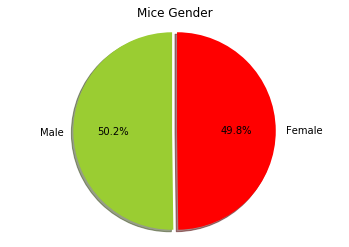

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

new_mouse_results_df['Sex'].value_counts()

mice_gender = ["Male", 'Female']
mice = [125, 124]
colors = ["yellowgreen", "red"]
explode = (0, 0.05)

plt.title("Mice Gender")
plt.pie(mice, explode=explode, labels=mice_gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()



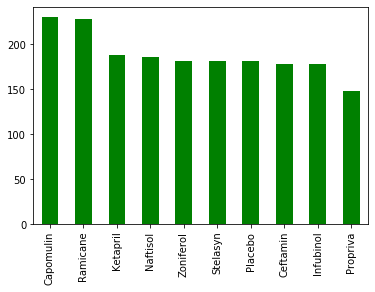

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_counts = new_mouse_results_df["Drug Regimen"].value_counts()
mice_counts

mice_counts.plot(kind="bar", facecolor="green")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

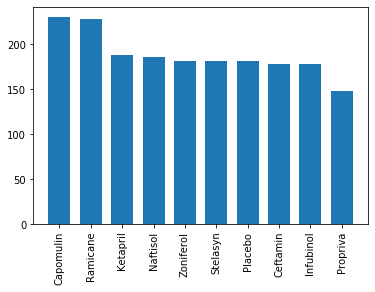

In [10]:
mice_counts = new_mouse_results_df["Drug Regimen"].value_counts()
mice_counts
x_value = mice_counts.index.values  #new_mouse_results_df["Drug Regimen"]
y_value=mice_counts.values



plt.bar(x_value, y_value, width=.7 )
plt.xticks(rotation=90)

In [11]:
# pie chart using plt 
            

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:   
mouse_max = new_mouse_results_df.groupby(['Mouse ID']).max()['Timepoint'] 
mouse_max = mouse_max.reset_index()
mouse_max
# merge data 

mouse_results_merge = pd.merge(
     mouse_max [['Mouse ID','Timepoint']], new_mouse_results_df , on=["Mouse ID",'Timepoint'] , how='left')

mouse_results_merge 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
 # Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in drug_list: 
    drug_volume =mouse_results_merge.loc[mouse_results_merge['Drug Regimen']==x]['Tumor Volume (mm3)']
    tumor_vol_data.append(drug_volume)
                                         
                                         
    quartiles = drug_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq  

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = drug_volume.loc[(drug_volume < lower_bound) | (drug_volume > upper_bound)]
    print(f"{x}'s outlier: {outlier}")


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


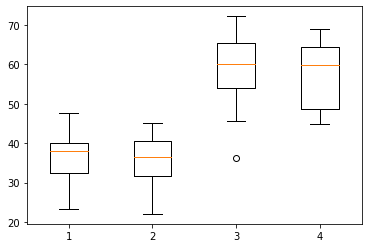

In [14]:
plt.boxplot(tumor_vol_data)
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

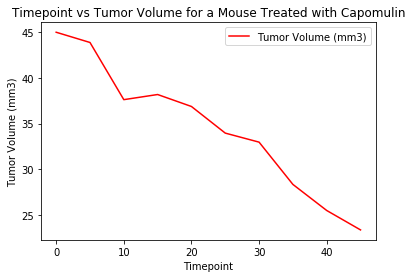

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_results_merge_bar1= mouse_results_merge[(mouse_results_merge['Mouse ID']=='s815' )]
x_values = mouse_results_merge_bar1['Timepoint'].reset_index()
y_values = mouse_results_merge_bar1['Tumor Volume (mm3)'].reset_index()


# x.- timepoint y = tumor  

#line_bar = mouse_results_merge.loc[(mouse_results_merge['Mouse ID'] == 's185')]
#line_bar.plot(x='Timepoint', y='Tumor Volume (mm3)', color='red')
#plt.title("Timepoint vs Tumor Volume for a Mouse Treated with Capomulin")
#plt.ylabel('Tumor Volume (mm3)')

line_bar = new_mouse_results_df.loc[(new_mouse_results_df['Mouse ID'] == 's185')]
line_bar.plot(x='Timepoint',y='Tumor Volume (mm3)', color="red")
plt.title("Timepoint vs Tumor Volume for a Mouse Treated with Capomulin")
plt.ylabel('Tumor Volume (mm3)')

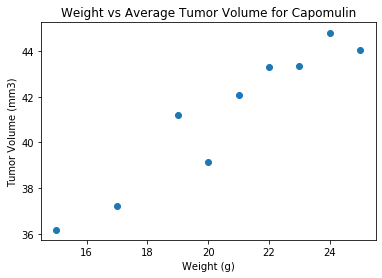

In [16]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 

#filter with loc for data only capomulin 
capomulin_dataset = new_mouse_results_df.loc[new_mouse_results_df['Drug Regimen'] == 'Capomulin']
capomulin_average = capomulin_dataset.groupby(['Weight (g)']).mean().reset_index()

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Average Tumor Volume for Capomulin")
plt.show()




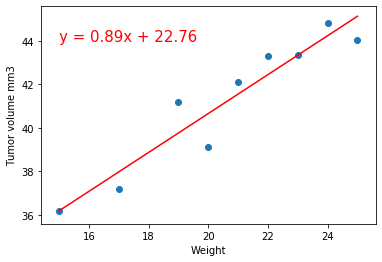

'\n\n\n\nplt.plot(x_values,regress_values,"r-")\nplt.annotate(line_eq,(15,44),fontsize=15,color="red")\nplt.xlabel(\'Weight\')\nplt.ylabel(\'Tummor Volume\')\nplt.title(\'Mouse Weight & Average Tumor Volume for the Capomulin Regimen\')\nplt.show()\n'

In [26]:
#define x and y values 
x_values = capomulin_average['Weight (g)']
y_values =  capomulin_average['Tumor Volume (mm3)'] 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(15,44),fontsize=15,color="red")

#grafica la linea de la regresión 

plt.plot(x_values,regress_values,"r-")

#graficar 
plt.scatter(x_values,y_values)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Tumor volume mm3')
plt.show()
